In [10]:
%run utils.ipynb

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_digits

def n_components_fa(data):
    np.random.seed(5)
    n_components = data['n_features']
    n_components_range = list(range(1,n_components+1))

    # Create and Run FA
    fa = FactorAnalysis()
    fa.fit(data['X'])

    # Create Pipeline and Find the best n
    decision_tree = DecisionTreeClassifier()
    pipe = Pipeline(steps=[('fa', fa), ('decision_tree', decision_tree)])
    estimator = GridSearchCV(pipe, dict(fa__n_components=n_components_range), cv = 3)
    estimator.fit(data['X'], data['y'])
    results = estimator.cv_results_
    best_n = estimator.best_estimator_.named_steps['fa'].n_components

    fig, ax = plt.subplots()
    ax.bar(n_components_range, fa.noise_variance_, color='C0')
    plt.axis('tight')
    plt.xlabel('n_components')
    ax.set_ylabel('noise_variance_')

    ax1 = ax.twinx()

    #Plotting the accuracies and best component
    ax1.plot(results['mean_test_score'], linewidth=2, color='C1')
    ax1.set_ylabel('Mean Cross Validation Accuracy', color='C1')

    ax1.axvline(best_n, linestyle=':', label='n_components chosen', linewidth = 2, color='C3')

    plt.legend(prop=dict(size=12))
    plt.title('Accuracy/Noise Variance for FA %s (best n_components=  %d)'%(data['name'],best_n ))
    plt.show()

def reconstruction_error(data):
    n_components_range = list(range(1, data['n_features']+1))
    vals = []
    for n_component in n_components_range:
        pca = PCA(n_components=n_component)
        transform = pca.fit_transform(data['X'])
        inverse = pca.inverse_transform(transform)
        _error = ((data['X'] - inverse) ** 2).mean()
        vals.append({
            'error': _error
        })
    df = pd.DataFrame(vals)
    return df
    
def plot_reconstruction_error(df):
    plt.plot(df['error'], label=data['name'])
    plt.legend()
    plt.title("Reconstruction error")
    plt.show()

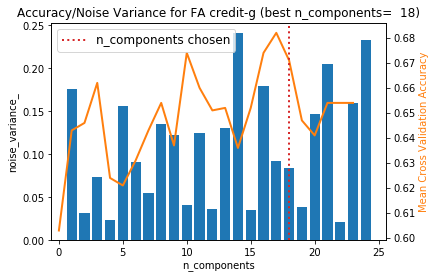

In [7]:
n_components_fa(cdata)

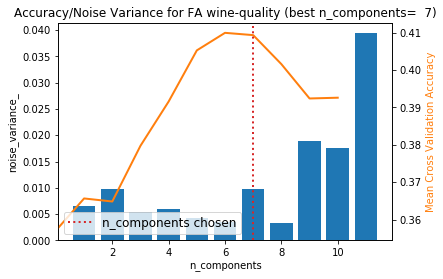

In [8]:
n_components_fa(wdata)

In [13]:
cdata['fa_n'] = 18
wdata['fa_n'] = 7

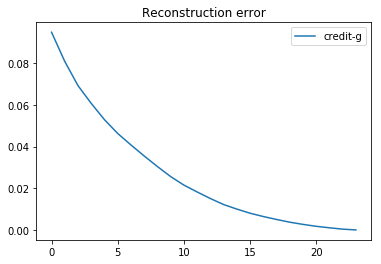

15
5


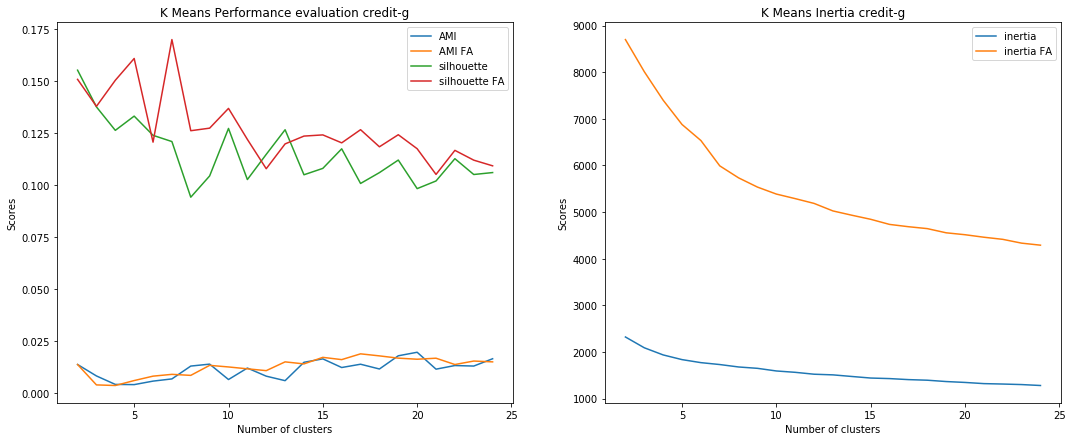

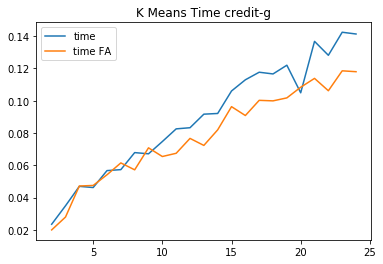

      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  2320.844198  k-means++     0.008802           2   0.517391   0.527   

   silhouette      time  v-measure  
0     0.15531  0.019939   0.014546  
------
      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  8699.303482  k-means++     0.008802           2   0.517391   0.527   

   silhouette     time  v-measure  
0    0.150881  0.02345   0.014546  
15
15


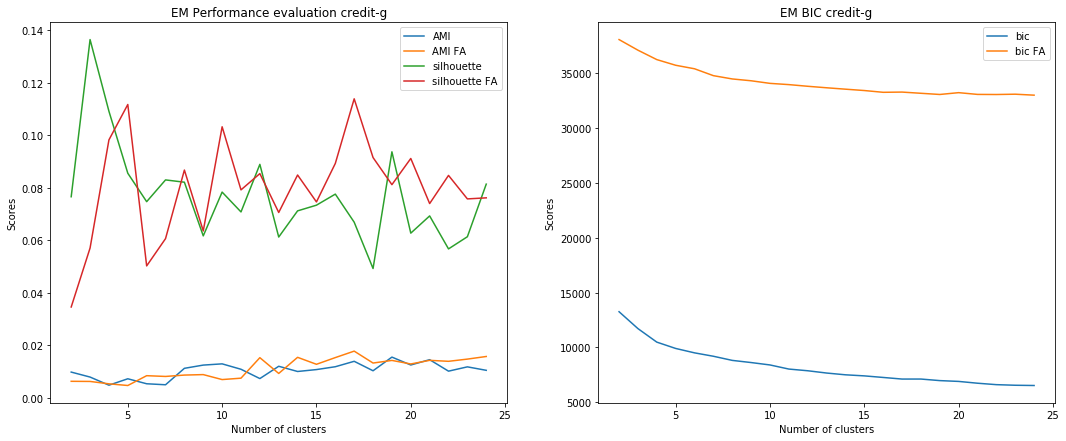

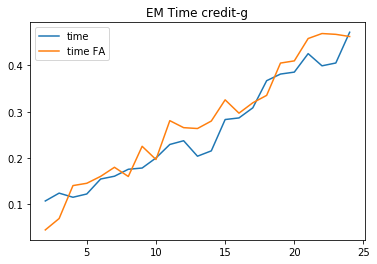

        AMI      ARI       NMI  accuracy           aic           bic  \
0  0.009766 -0.00694  0.011019     0.305  13011.834362  13262.129881   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.010504  0.388889    0.011559  gmm-em     0.007061           2   

   precision  recall  silhouette      time  v-measure  
0   0.536432   0.305    0.076612  0.045128   0.011006  
------
       AMI       ARI       NMI  accuracy           aic           bic  \
0  0.00625 -0.014608  0.007213     0.438  37894.793781  38086.196237   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.007023  0.452546    0.007408  gmm-em     0.004525           2   

   precision  recall  silhouette      time  v-measure  
0   0.468092   0.438    0.034576  0.107516    0.00721  


In [14]:
data = cdata
method = "FA"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)

# Reduce dimension
reduced_data = FactorAnalysis(n_components=data['fa_n']).fit_transform(data['X'])
    
# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)


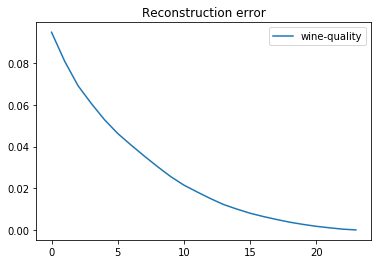

2
3


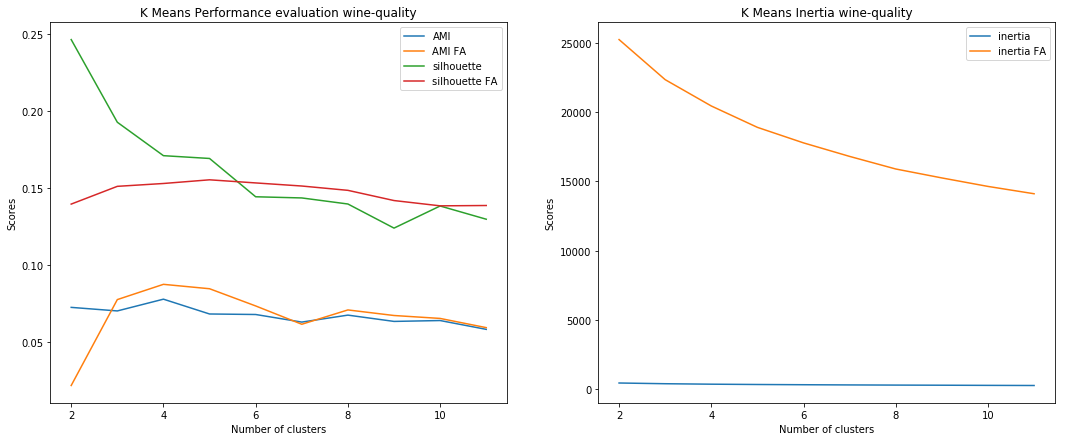

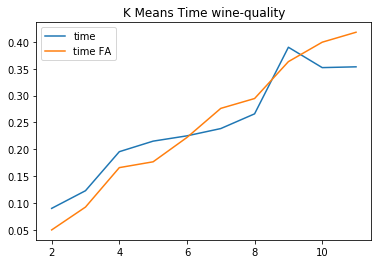

        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.062941  0.042266  0.078396  0.170478      0.064847   0.21876    0.094775   

      inertia       init  mutual_info  n_clusters  precision    recall  \
5  303.884606  k-means++     0.122302           7    0.32078  0.170478   

   silhouette      time  v-measure  
5    0.143471  0.276239   0.077006  
------
        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.061537  0.035512  0.076842  0.094733      0.063438  0.135261    0.093078   

        inertia       init  mutual_info  n_clusters  precision    recall  \
5  16812.463006  k-means++     0.120112           7   0.271698  0.094733   

   silhouette      time  v-measure  
5    0.151203  0.238668   0.075451  
3
4


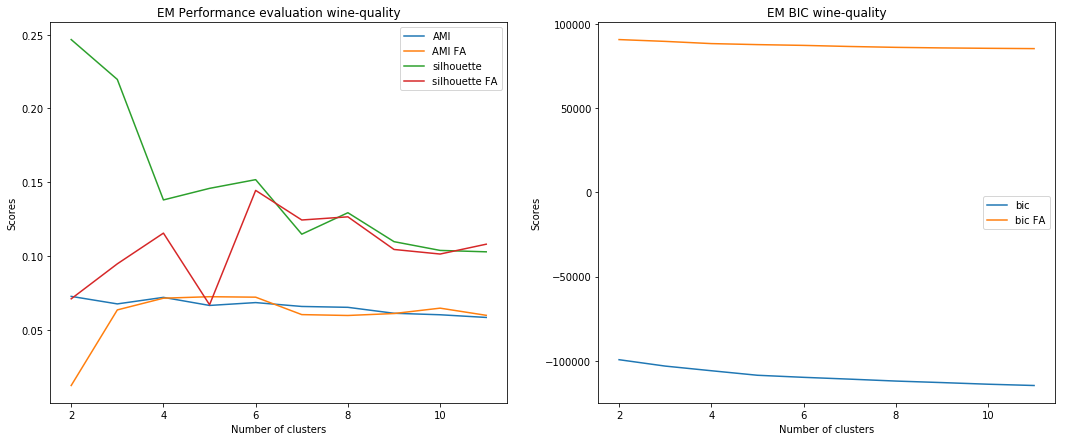

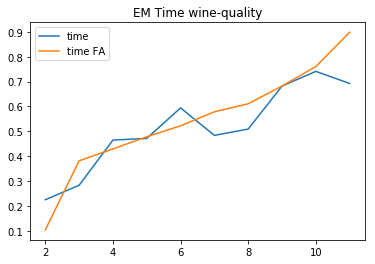

        AMI       ARI       NMI  accuracy            aic            bic  \
5  0.065826  0.042798  0.081983  0.171294 -111466.340671 -110881.648269   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5       0.06772  0.224067     0.09925  gmm-em     0.128077           7   

   precision    recall  silhouette      time  v-measure  
5   0.333372  0.171294    0.114796  0.578254   0.080508  
------
        AMI     ARI       NMI  accuracy           aic           bic  \
5  0.060302  0.0357  0.074835  0.136178  86063.246484  86466.034582   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5      0.062231  0.195022    0.089992  gmm-em     0.116129           7   

   precision    recall  silhouette      time  v-measure  
5   0.357799  0.136178    0.124411  0.483609    0.07358  


In [15]:
data = wdata
method = "FA"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)

# Reduce dimension
reduced_data = FactorAnalysis(n_components=data['fa_n']).fit_transform(data['X'])
    
# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)
